In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io as scio
import pydot
import graphviz
import keras.backend as K
import matplotlib.pyplot as plt
from IPython.display import SVG
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils import layer_utils
from keras.preprocessing import image
from keras import layers, regularizers
from keras.models import Model, load_model
from keras.utils.data_utils import get_file
from keras.utils.vis_utils import model_to_dot
from keras.layers import Flatten, Conv2D, MaxPooling1D
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import AveragePooling1D, MaxPooling1D, Dropout
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D,Conv1D
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization

In [2]:
K.set_image_data_format('channels_last')

In [3]:
def d1_model_ya(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv1D(32, kernel_size=4, padding='same', strides=2,name = 'layer1')(X_input)  
    X = Activation('relu')(X)
    X = MaxPooling1D(pool_size=2, name='max_pool1')(X)
     
    X = Conv1D(32, kernel_size=4, padding='same', strides=2,name = 'layer2')(X)

    X = Activation('relu')(X)
    X = MaxPooling1D(pool_size=2, name='max_pool2')(X)

    X = Conv1D(32, kernel_size=4, padding='same', strides=2,name = 'layer3')(X) 
    X = Activation('relu')(X)
    X = MaxPooling1D(pool_size=2, name='max_pool3')(X)
    

    X = Dropout(0.5)(X)    
    
    X = Flatten()(X)
    
    X = Dense(64, name='fc1')(X)
    X = Activation('relu')(X)
    X = Dropout(0.5)(X) 
    X = Dense(7, activation='softmax')(X)

    d1_model_ya = Model(inputs=X_input,outputs=X)
    
    return d1_model_ya

In [4]:
d1_model_ya = d1_model_ya(input_shape=(1024,1))
d1_model_ya.summary()
opt = adam_v2.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
d1_model_ya.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
from time import time
start = time()
history=d1_model_ya.fit(X_train, Y_train, epochs=20,batch_size=32, validation_split=0.2)
#d1_model_ya.fit(X_train, Y_train, epochs = 10, batch_size=32)
end = time()
print("CPU_time =" + str(end-start))

d1_model_ya.save('d1_model_ya.h5')


#import scipy.io as scio
y1=history.history['accuracy']
y2=history.history['val_accuracy']
y3=history.history['loss']
y4=history.history['val_loss']
scio.savemat('acc.mat', {'data': y1 }) 
scio.savemat('val_acc.mat', {'data': y2 })
scio.savemat('loss.mat', {'data': y3 })
scio.savemat('val_loss.mat', {'data': y4 })

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024, 1)]         0         
_________________________________________________________________
layer1 (Conv1D)              (None, 512, 32)           160       
_________________________________________________________________
activation (Activation)      (None, 512, 32)           0         
_________________________________________________________________
max_pool1 (MaxPooling1D)     (None, 256, 32)           0         
_________________________________________________________________
layer2 (Conv1D)              (None, 128, 32)           4128      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 32)           0         
_________________________________________________________________
max_pool2 (MaxPooling1D)     (None, 64, 32)            0     

F:\Anaconda3\envs\pytorch\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
119/119 [==============================] - 3s 11ms/step - loss: 1.6036 - accuracy: 0.3243 - val_loss: 1.2142 - val_accuracy: 0.5026
Epoch 2/20
119/119 [==============================] - 1s 9ms/step - loss: 1.1926 - accuracy: 0.5181 - val_loss: 0.8921 - val_accuracy: 0.6432
Epoch 3/20
119/119 [==============================] - 1s 9ms/step - loss: 0.9244 - accuracy: 0.6145 - val_loss: 0.7169 - val_accuracy: 0.7104
Epoch 4/20
119/119 [==============================] - 1s 9ms/step - loss: 0.7906 - accuracy: 0.6589 - val_loss: 0.6419 - val_accuracy: 0.7219
Epoch 5/20
119/119 [==============================] - 1s 9ms/step - loss: 0.7339 - accuracy: 0.6723 - val_loss: 0.5981 - val_accuracy: 0.7261
Epoch 6/20
119/119 [==============================] - 1s 9ms/step - loss: 0.6668 - accuracy: 0.6962 - val_loss: 0.5600 - val_accuracy: 0.7366
Epoch 7/20
119/119 [==============================] - 1s 9ms/step - loss: 0.5845 - accuracy: 0.7319 - val_loss: 0.4548 - val_accuracy: 0.7859
Epoch

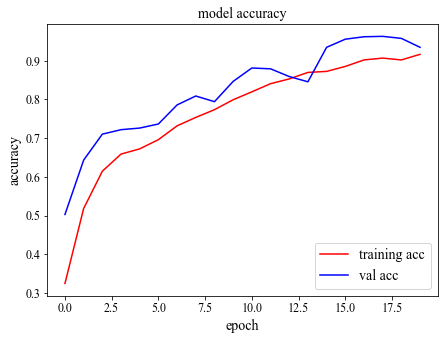

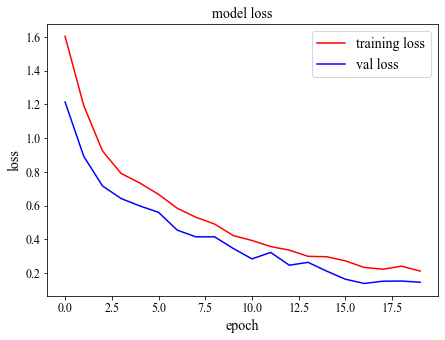

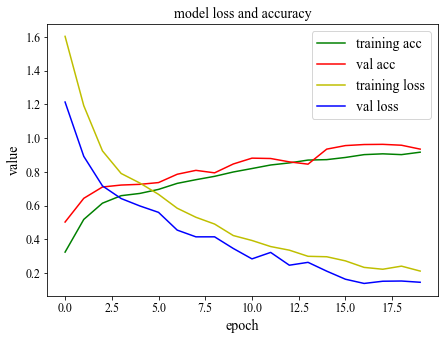

In [5]:
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
}

font3 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
}

font4 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
}


#fig = plt.figure()
figsize = 7,5
figure, ax = plt.subplots(figsize=figsize)
plt.tick_params(labelsize=12)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.plot(history.history['accuracy'],'-r',label='training acc',linewidth=1.5)
plt.plot(history.history['val_accuracy'],'-b',label='val acc',linewidth=1.5)
plt.title('model accuracy',font2)
plt.ylabel('accuracy',font2)
plt.xlabel('epoch',font2)
plt.legend(loc='lower right',prop=font2)

#fig = plt.figure()
figsize = 7,5
figure, ax = plt.subplots(figsize=figsize)
plt.tick_params(labelsize=12)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.plot(history.history['loss'],'-r',label='training loss',linewidth=1.5)
plt.plot(history.history['val_loss'],'-b', label='val loss',linewidth=1.5)
plt.title('model loss',font2)
plt.ylabel('loss',font2)
plt.xlabel('epoch',font2)
plt.legend(loc='upper right',prop=font3)

figsize = 7,5
figure, ax = plt.subplots(figsize=figsize)
plt.tick_params(labelsize=12)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.plot(history.history['accuracy'],'-g',label='training acc',linewidth=1.5)
plt.plot(history.history['val_accuracy'],'-r',label='val acc',linewidth=1.5)
plt.plot(history.history['loss'],'-y',label='training loss',linewidth=1.5)
plt.plot(history.history['val_loss'],'-b', label='val loss',linewidth=1.5)
plt.title('model loss and accuracy',font2)
plt.ylabel('value',font2)
plt.xlabel('epoch',font2)
plt.legend(loc='best',prop=font2)

In [6]:
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

d1_model = load_model('d1_model_ya.h5')
start2 = time()
preds = d1_model.evaluate(x = X_test, y = Y_test)
end2 = time()
print("CPU_time2 =" + str(end2-start2))
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

64/64 [==============================] - 0s 3ms/step - loss: 0.1425 - accuracy: 0.9383
CPU_time2 =0.33142876625061035

Loss = 0.14249055087566376
Test Accuracy = 0.9382655620574951


In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

model=load_model("d1_model_ya.h5")
y_pred=model.predict(X_test).argmax(axis=1)
y_true=Y_test.argmax(axis=1)
print(y_pred.shape,y_true.shape)
C= confusion_matrix(y_true, y_pred)

(2041,) (2041,)


In [9]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):### jet Blues Reds Greens gray cyan Paired
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
         
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    
    cb = plt.colorbar()
    for l in cb.ax.yaxis.get_ticklabels():
        l.set_family('Times New Roman')
        
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=45,fontsize=10)
    plt.yticks(tick_marks,classes,fontsize=10) 
    fmt = '.2f' if normalize else 'd'
#    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, format(cm[i, j], fmt),size = 12, family = "Times New Roman",color = "black", horizontalalignment="center")

    plt.tight_layout()
    plt.ylabel('True label',font2)
    plt.xlabel('Predicted label',font2)

Confusion matrix, without normalization
[[278   0   0   0   0   0   0]
 [  0 319   0   0   0   0   0]
 [  0   0 208   0   2   0 110]
 [  0   0   0 288   0   0   0]
 [  0   0   0   0 281   0   0]
 [  5   0   0   0   7 268   1]
 [  0   0   1   0   0   0 273]]


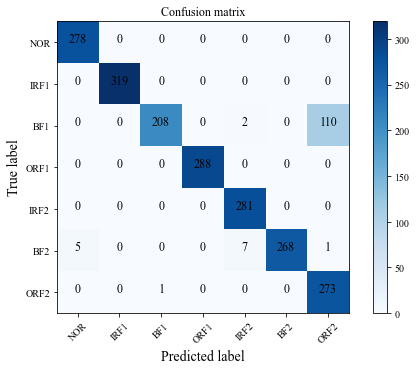

In [10]:
attack_types = ['NOR', 'IRF1', 'BF1', 'ORF1','IRF2', 'BF2', 'ORF2',]

figsize = 7,5
figure, ax = plt.subplots(figsize=figsize)
plt.tick_params(labelsize=12)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.title('Confusion matrix',font2)
#plot_confusion_matrix(C, classes=attack_types, normalize=True)
plot_confusion_matrix(C, classes=attack_types, normalize=False)

(2041, 64)
(2041, 2)
[[ 52.948658  -15.161382 ]
 [-57.30698    -1.2765749]
 [ 44.78256    29.994802 ]
 ...
 [-53.354855    0.5152284]
 [ 43.283146   26.304386 ]
 [ -0.8414555 -43.049133 ]]


Text(0.5, 0, 'Component2')

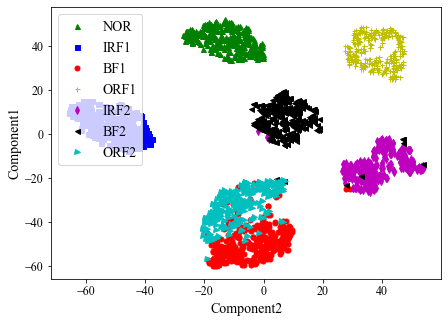

In [14]:
from sklearn.manifold import TSNE
Y_TSNE_train = np.load('Y_TSNE_train.npy')
Y_TSNE_test = np.load('Y_TSNE_test.npy')

dense_layer = Model(inputs=d1_model_ya.input,  
                    outputs=d1_model_ya.get_layer('fc1').output)

dense1_output = dense_layer.predict(X_test)
print(dense1_output.shape)

tsne = TSNE(n_components=2, random_state=0)
X_test_tsne = tsne.fit_transform(dense1_output)

print(np.asarray(X_test_tsne).shape)
print(X_test_tsne)
Y_TSNE_test.shape
Y_TSNE_test=Y_TSNE_test.reshape(2041)


scio.savemat('X_test_tsne.mat', {'data': X_test_tsne })
scio.savemat('Y_TSNE_test.mat', {'data': Y_TSNE_test })

figsize = 7,5
figure, ax = plt.subplots(figsize=figsize)
plt.tick_params(labelsize=12)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]


plt.plot(X_test_tsne[:, 0][Y_TSNE_test==0], X_test_tsne[:, 1][Y_TSNE_test==0], "g^", label="NOR",markersize=5)
plt.plot(X_test_tsne[:, 0][Y_TSNE_test==1], X_test_tsne[:, 1][Y_TSNE_test==1], "bs", label="IRF1",markersize=5)
plt.plot(X_test_tsne[:, 0][Y_TSNE_test==2], X_test_tsne[:, 1][Y_TSNE_test==2], "ro", label="BF1",markersize=5)
plt.plot(X_test_tsne[:, 0][Y_TSNE_test==3], X_test_tsne[:, 1][Y_TSNE_test==3], "y+", label="ORF1",markersize=5)
plt.plot(X_test_tsne[:, 0][Y_TSNE_test==4], X_test_tsne[:, 1][Y_TSNE_test==4], "md", label="IRF2",markersize=5)
plt.plot(X_test_tsne[:, 0][Y_TSNE_test==5], X_test_tsne[:, 1][Y_TSNE_test==5], "k<", label="BF2",markersize=5)
plt.plot(X_test_tsne[:, 0][Y_TSNE_test==6], X_test_tsne[:, 1][Y_TSNE_test==6], "c>", label="ORF2",markersize=5)

plt.legend(loc="upper left",prop=font4)
plt.ylabel('Component1',font2)
plt.xlabel('Component2',font2)

#plt.title("tsen",font2)
#plt.savefig("D:/")

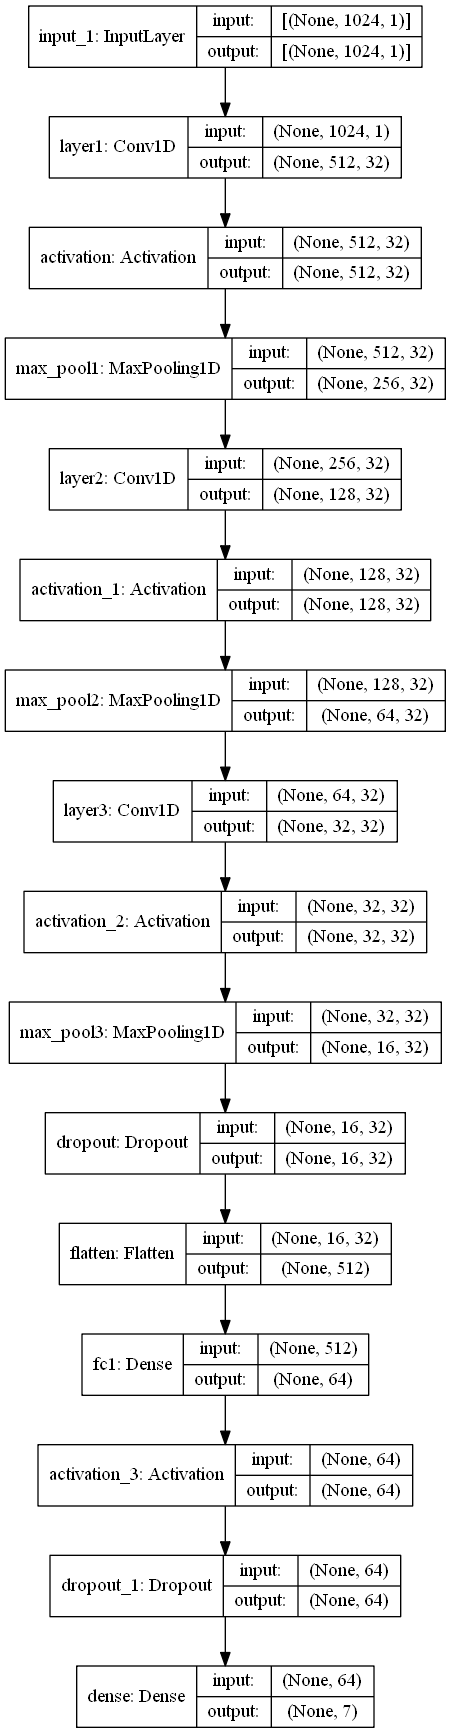

In [12]:
plot_model(model=d1_model_ya, to_file='d1_model_ya.png', show_shapes=True)